# Importing Library

In [ ]:
import numpy as np  # Import library numpy untuk operasi numerik
import pandas as pd  # Import library pandas untuk manipulasi data
import tensorflow as tf
import json  # Import library json untuk membaca data dari file JSON
import pandas as pd
import re
#import nltk
#from nltk.corpus import stopwords
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#from transformers import BertTokenizer, TFBertModel
#from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout, Lambda
from keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from sklearn.metrics import precision_score, recall_score
from flask import Flask, request, jsonify


# Setup Environtment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [ ]:
with open('drive/MyDrive/Chatbot-MentalHealth/datasetupdt (2).json', 'r') as f:
    data = json.load(f)  # Membaca data dari file JSON dan menyimpannya dalam variabel 'data'

df = pd.DataFrame(data['intents'])
pd.set_option("display.max_rows", None)  # Membuat DataFrame dari bagian 'intents' dalam data JSON
df

,tag,patterns,responses
0,greeting,"[Hai, Hey, Apakah ada orang di sini?, Woy, Hel...",[Halo. Ceritakan bagaimana perasaanmu hari ini...
1,morning,"[Pagi, Selamat pagi, Morning, Good morning]",[Selamat pagi. Saya harap tidur malam Anda nye...
2,afternoon,"[Siang, Selamat siang, Afternoon, Good afternoon]","[Selamat siang. Bagaimana harimu?, Hai, semoga..."
3,evening,"[Selamat malam, Malam, Evening]","[Selamat malam. Bagaimana harimu?, Hai, semoga..."
4,night,"[Selamat malam, Malam, Night, Good night]","[Selamat malam. Tidurlah yang nyenyak, Selamat..."
5,goodbye,"[Selamat tinggal, Sampai jumpa lagi, Selamat t...","[Sampai jumpa lagi., Semoga harimu menyenangka..."
6,thanks,"[Terima kasih, Makasih, Sangat membantu, Terim...","[Saya senang bisa membantu!, Sama-sama, semoga..."
7,no-response,[],"[Maaf, aku tidak memahamimu., Silakan lanjutka..."
8,neutral-response,[tidak ada yang menarik],[Oh begitu. Apakah kamu ingin membicarakan ses...
9,about,"[Siapa kamu?, Kamu itu apa?, Ceritakan padaku ...","[Saya Pandora, Personal Therapeutic AI Assista..."


In [ ]:
import pandas as pd

df = pd.read_csv('drive/MyDrive/Chatbot-MentalHealth/data_chatbot_mental_health.csv')
df


,tag,patterns,responses
0,greeting,Hai,['Halo. Ceritakan bagaimana perasaanmu hari in...
1,greeting,Hey,['Halo. Ceritakan bagaimana perasaanmu hari in...
2,greeting,Apakah ada orang di sini?,['Halo. Ceritakan bagaimana perasaanmu hari in...
3,greeting,Woy,['Halo. Ceritakan bagaimana perasaanmu hari in...
4,greeting,Hello,['Halo. Ceritakan bagaimana perasaanmu hari in...
5,greeting,Halo,['Halo. Ceritakan bagaimana perasaanmu hari in...
6,greeting,Howdy,['Halo. Ceritakan bagaimana perasaanmu hari in...
7,greeting,Hola,['Halo. Ceritakan bagaimana perasaanmu hari in...
8,greeting,Bonjour,['Halo. Ceritakan bagaimana perasaanmu hari in...
9,greeting,Konnichiwa,['Halo. Ceritakan bagaimana perasaanmu hari in...


### Handling Missing Value

In [ ]:
# Mengganti nilai NaN atau None di kolom 'patterns' dengan string kosong atau nilai yang diinginkan
df['patterns'] = df['patterns'].fillna('')

# Memastikan semua nilai di kolom 'patterns' adalah string
df['patterns'] = df['patterns'].astype(str)

# Memeriksa apakah masih ada nilai yang tidak valid
print(df['patterns'].isna().sum())


0


In [ ]:
# Membuat dictionary kosong untuk menyimpan data yang akan diubah ke DataFrame
dic = {"tag": [], "patterns": [], "responses": []}

# Loop untuk mengambil data dari DataFrame dan memasukkannya ke dalam dictionary
for index, row in df.iterrows():
    tag = row['tag']
    patterns = row['patterns'].split(',')  # Anda perlu membagi string patterns menjadi list
    responses = row['responses'].split(',')  # Anda perlu membagi string responses menjadi list

    for pattern in patterns:
        dic['tag'].append(tag)
        dic['patterns'].append(pattern.strip())  # membersihkan spasi di sekitar pola
        dic['responses'].append(responses)  # simpan list respons sebagai satu elemen

# Membuat DataFrame dari dictionary
df = pd.DataFrame.from_dict(dic)

# Menampilkan DataFrame
df

,tag,patterns,responses
0,greeting,Hai,[['Halo. Ceritakan bagaimana perasaanmu hari i...
1,greeting,Hey,[['Halo. Ceritakan bagaimana perasaanmu hari i...
2,greeting,Apakah ada orang di sini?,[['Halo. Ceritakan bagaimana perasaanmu hari i...
3,greeting,Woy,[['Halo. Ceritakan bagaimana perasaanmu hari i...
4,greeting,Hello,[['Halo. Ceritakan bagaimana perasaanmu hari i...
5,greeting,Halo,[['Halo. Ceritakan bagaimana perasaanmu hari i...
6,greeting,Howdy,[['Halo. Ceritakan bagaimana perasaanmu hari i...
7,greeting,Hola,[['Halo. Ceritakan bagaimana perasaanmu hari i...
8,greeting,Bonjour,[['Halo. Ceritakan bagaimana perasaanmu hari i...
9,greeting,Konnichiwa,[['Halo. Ceritakan bagaimana perasaanmu hari i...


# Data Preprocessing

no 2

In [ ]:
p = len(df['tag'].unique())
print(p)

134


### Tokenizing

In [ ]:
tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 657,
 'word_counts': '{"hai": 1, "hey": 1, "apakah": 101, "ada": 67, "orang": 12, "di": 24, "sini": 1, "woy": 1, "hello": 1, "halo": 1, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "apa": 111, "kabar": 1, "pagi": 2, "selamat": 7, "morning": 2, "good": 3, "siang": 2, "afternoon": 2, "malam": 4, "evening": 1, "night": 2, "tinggal": 3, "sampai": 5, "jumpa": 5, "lagi": 15, "au": 1, "revoir": 1, "sayonara": 1, "oke": 3, "jalan": 1, "besok": 1, "bertemu": 2, "lain": 13, "waktu": 3, "terima": 5, "kasih": 5, "makasih": 1, "sangat": 15, "membantu": 12, "untuk": 104, "bantuannya": 1, "banyak": 15, "thank": 1, "you": 1, "tidak": 77, "yang": 192, "menarik": 1, "siapa": 18, "kamu": 34, "itu": 24, "ceritakan": 4, "padaku": 1, "lebih": 18, "tentang": 37, "dirimu": 2, "namamu": 2, "aku": 72, "harus":

In [ ]:
  vocab_size = len(tokenizer.word_index)  # Menghitung jumlah kata unik dalam tokenizer
  print('number of unique words = ', vocab_size)  # Menampilkan jumlah kata unik

number of unique words =  638


### Converts pattern text to a sequence of numbers

### Splitting Data

In [ ]:
ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])  # Mengonversi teks pola menjadi urutan angka
X = pad_sequences(ptrn2seq, padding='post')  # Melakukan padding terhadap urutan angka
print('X shape = ', X.shape)  # Menampilkan bentuk (shape) dari X

lbl_enc = LabelEncoder()  # Membuat objek LabelEncoder
y = lbl_enc.fit_transform(df['tag'])  # Mengonversi label kelas menjadi angka
print('y shape = ', y.shape)  # Menampilkan bentuk (shape) dari y
print('num of classes = ', len(np.unique(y)))  # Menampilkan jumlah kelas unik

X shape =  (657, 24)
y shape =  (657,)
num of classes =  134


# Encoding

In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)

# Transformasi data target menjadi angka
y_encoded = label_encoder.transform(y)

no 3

# Model Building

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 100)           63900     
                                                                 
 lstm (LSTM)                 (None, 24, 32)            17024     
                                                                 
 layer_normalization (Layer  (None, 24, 32)            64        
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (None, 24, 32)            8320      
                                                                 
 layer_normalization_1 (Lay  (None, 24, 32)            64        
 erNormalization)                                                
                                                                 
 lstm_2 (LSTM)               (None, 32)                8

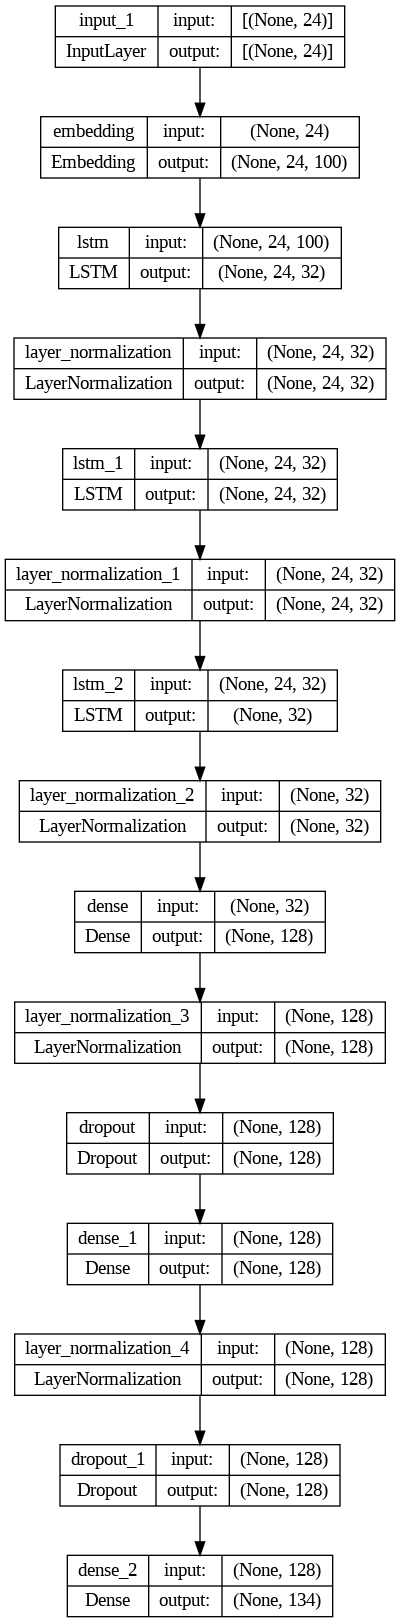

In [ ]:
model = Sequential()

model.add(Input(shape=(X.shape[1])))
model.add(Embedding(input_dim=vocab_size+1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(LSTM(32, kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model_history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=10,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
    epochs=50
)

Epoch 1/50
53/53 [==============================] - 23s 137ms/step - loss: 5.3182 - accuracy: 0.0248 - val_loss: 5.0653 - val_accuracy: 0.0455
Epoch 2/50
53/53 [==============================] - 4s 75ms/step - loss: 4.3998 - accuracy: 0.1029 - val_loss: 4.8050 - val_accuracy: 0.0758
Epoch 3/50
53/53 [==============================] - 3s 55ms/step - loss: 3.7007 - accuracy: 0.1943 - val_loss: 4.5601 - val_accuracy: 0.0758
Epoch 4/50
53/53 [==============================] - 2s 45ms/step - loss: 3.0907 - accuracy: 0.3486 - val_loss: 4.3220 - val_accuracy: 0.1364
Epoch 5/50
53/53 [==============================] - 2s 46ms/step - loss: 2.5429 - accuracy: 0.4610 - val_loss: 4.1554 - val_accuracy: 0.1667
Epoch 6/50
53/53 [==============================] - 4s 72ms/step - loss: 2.0570 - accuracy: 0.5905 - val_loss: 4.0832 - val_accuracy: 0.2045
Epoch 7/50
53/53 [==============================] - 5s 94ms/step - loss: 1.7398 - accuracy: 0.6743 - val_loss: 3.9987 - val_accuracy: 0.2652
Epoch 8/50


### Precision and Recall

In [ ]:
# Melakukan prediksi menggunakan model terlatih
y_pred = model.predict(X)

# Mengambil kelas prediksi dengan nilai probabilitas tertinggi
y_pred_classes = y_pred.argmax(axis=-1)

# Menghitung precision dan recall

precision = precision_score(y, y_pred_classes, average='weighted')
recall = recall_score(y, y_pred_classes, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

21/21 [==============================] - 5s 14ms/step
Precision: 0.8168963625584629
Recall: 0.817351598173516


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluasi model menggunakan data validasi
y_val_pred = model.predict(X)
y_val_pred = np.argmax(y_val_pred, axis=1)

# Hitung metrik kinerja
accuracy = accuracy_score(y, y_val_pred)
precision = precision_score(y, y_val_pred, average='weighted')
recall = recall_score(y, y_val_pred, average='weighted')
f1 = f1_score(y, y_val_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


21/21 [==============================] - 0s 19ms/step
Accuracy: 0.817351598173516
Precision: 0.8168963625584629
Recall: 0.817351598173516
F1 Score: 0.8034600681369876


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
previous_research = {
    'accuracy': 0.61,
    'precision': 0.53,
    'recall': 0.60,
    'f1': 0.48
}


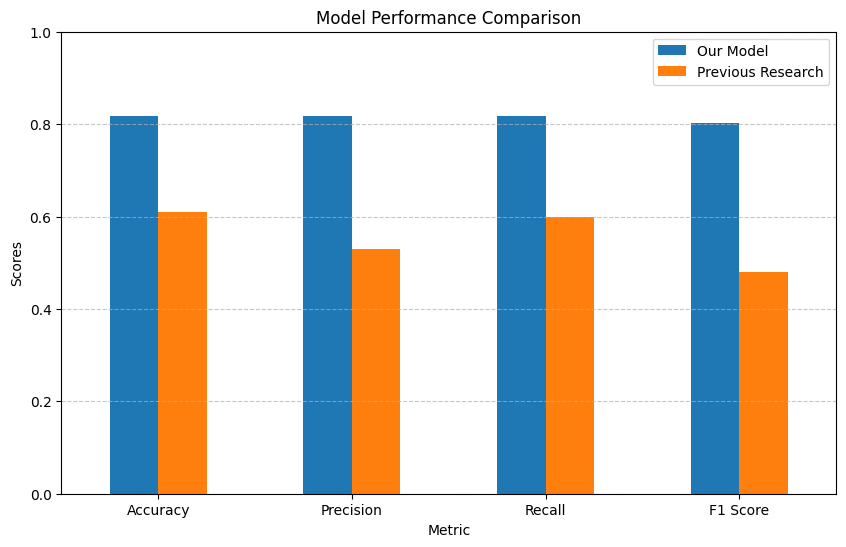

In [ ]:
import matplotlib.pyplot as plt

# Data kinerja model kita
our_model = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1
}

# Membuat DataFrame untuk visualisasi
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Our Model': [our_model['accuracy'], our_model['precision'], our_model['recall'], our_model['f1']],
    'Previous Research': [previous_research['accuracy'], previous_research['precision'], previous_research['recall'], previous_research['f1']]
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

metrics_df.plot(kind='bar', x='Metric', ax=ax)
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Visualization

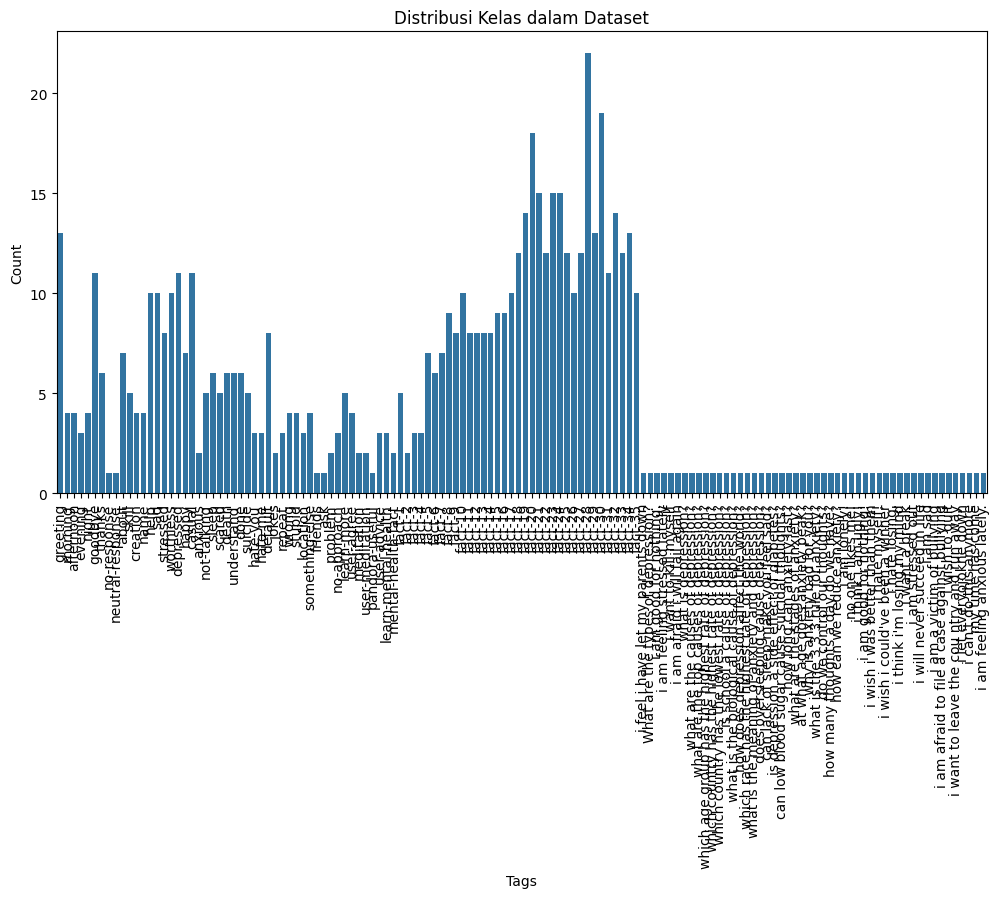

Beberapa contoh data patterns dan tags:
                    patterns       tag
0                        Hai  greeting
1                        Hey  greeting
2  Apakah ada orang di sini?  greeting
3                        Woy  greeting
4                      Hello  greeting


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Visualisasi distribusi kelas dalam dataset
plt.figure(figsize=(12, 6))
sns.countplot(x=df['tag'])
plt.title('Distribusi Kelas dalam Dataset')

plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Menampilkan beberapa contoh data patterns dan tags
print("Beberapa contoh data patterns dan tags:")
print(df[['patterns', 'tag']].head())


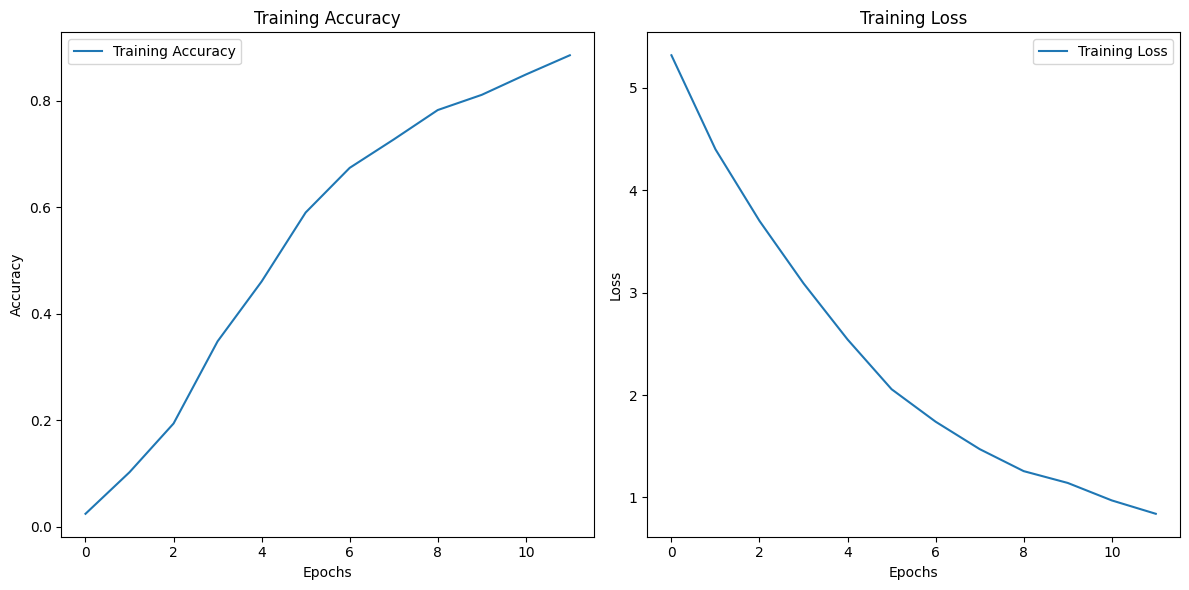

In [ ]:
# Visualisasi Akurasi dan Loss selama proses pelatihan
history = model_history.history

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Metrix

In [ ]:
# Predict on validation data
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

5/5 [==============================] - 0s 20ms/step


In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred_classes)


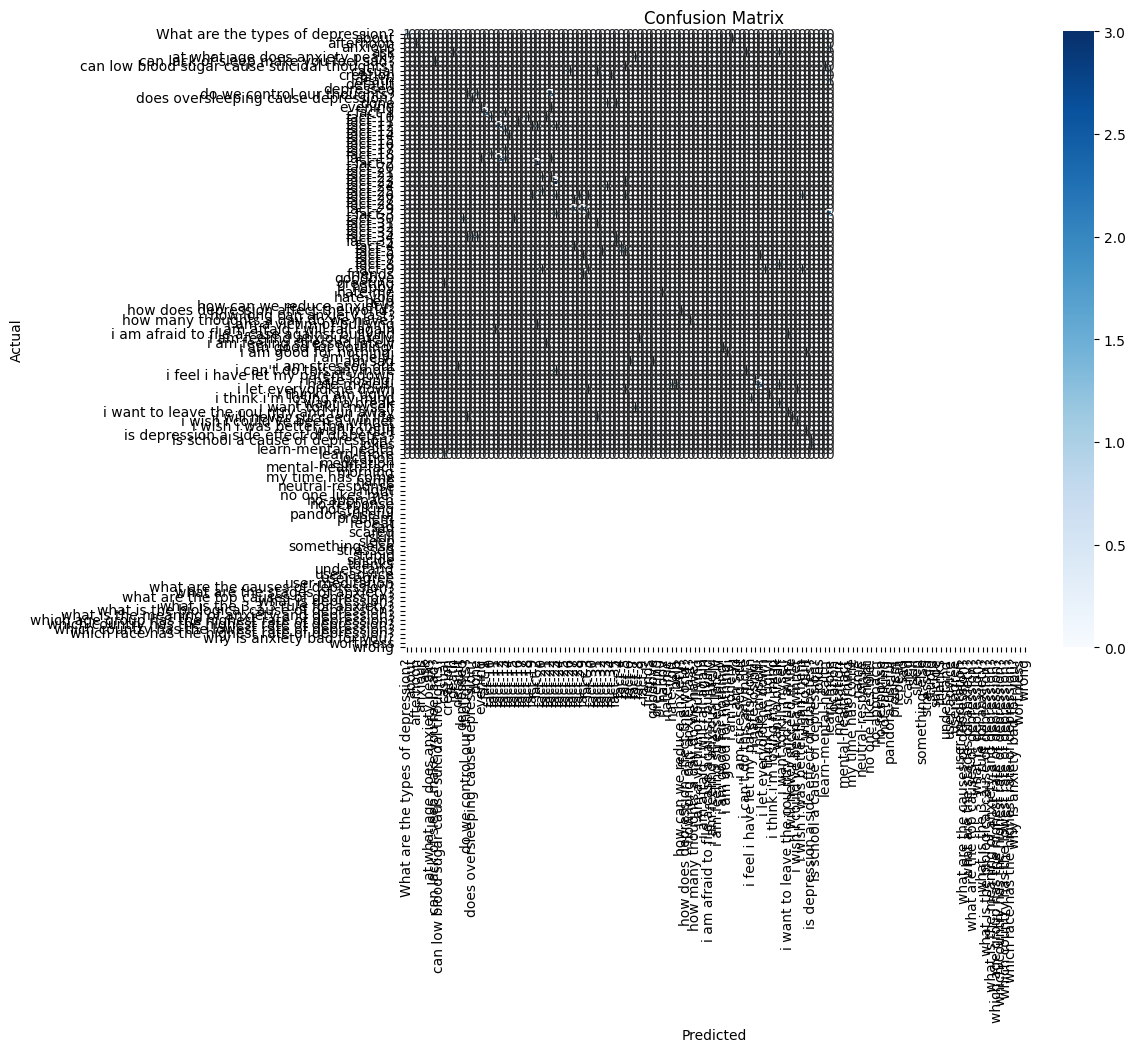

In [ ]:
# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lbl_enc.classes_, yticklabels=lbl_enc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Model Demo

In [ ]:
# Load responses based on tags
responses_data = {}
for _, row in df.iterrows():
    responses_data[row['tag']] = row['responses']

# Daftar tag yang relevan untuk ditampilkan
relevant_tags = ["scared", "anxious", "depressed", "suicide", "stressed", "worthless"]

# Fungsi untuk memulai sesi percakapan
def start_conversation():
    print("Chatbot: Hai! Saya di sini untuk membantu Anda dengan segala kekhawatiran kesehatan mental yang Anda miliki.")
    print("Chatbot: Jika Anda ingin memulai percakapan, ketik 'temanngobrol'.")

# Fungsi untuk menganalisis input pengguna dan memprediksi masalah kesehatan mental
def analyze_input(user_input):
    sequences = tokenizer.texts_to_sequences([user_input])
    padded_sequences = pad_sequences(sequences, maxlen=X.shape[1], padding='post')
    prediction = model.predict(padded_sequences)
    predicted_label = lbl_enc.inverse_transform([np.argmax(prediction)])
    confidence = np.max(prediction) * 100
    print(f"Chatbot: Berdasarkan input Anda, saya memprediksi bahwa Anda mungkin mengalami '{predicted_label[0]}' dengan {confidence:.2f}% kepercayaan.")
    if predicted_label[0] in responses_data:
        print("Chatbot:", np.random.choice(responses_data[predicted_label[0]]))

# Fungsi untuk menganalisis kondisi kesehatan mental berdasarkan jawaban pengguna
def analyze_mental_health(user_responses):
    masalah_kesehatan_mental = []
    for response in user_responses:
        sequences = tokenizer.texts_to_sequences([response])
        padded_sequences = pad_sequences(sequences, maxlen=X.shape[1], padding='post')
        prediction = model.predict(padded_sequences)
        predicted_label = lbl_enc.inverse_transform([np.argmax(prediction)])
        if predicted_label[0] in relevant_tags and predicted_label[0] not in masalah_kesehatan_mental:
            masalah_kesehatan_mental.append(predicted_label[0])

    if masalah_kesehatan_mental:
        print("Chatbot: Berdasarkan percakapan kita, sepertinya Anda mungkin mengalami masalah kesehatan mental berikut:")
        for issue in masalah_kesehatan_mental:
            print("- " + issue)
            if issue in responses_data:
                print("Chatbot:", np.random.choice(responses_data[issue]))
    else:
        print("Chatbot: Berdasarkan percakapan kita, sepertinya Anda saat ini tidak mengalami masalah kesehatan mental yang spesifik sesuai dengan kriteria kami.")

# Loop percakapan
start_conversation()
jawaban_pengguna = []
while True:
    user_input = input("Anda: ")
    if user_input.lower() == 'temanngobrol':
        print("Chatbot: Hebat! Mari mulai percakapannya.")
        print("Chatbot: Tolong jawab pertanyaan-pertanyaan berikut untuk membantu saya memahami kesehatan mental Anda lebih baik.")
        print("Perlu diingat bahwa kejujuran anda dan keseriusan anda dalam menjawab pertanyaan dapat membantu kami untuk menganalisa permasalahan anda.")
        print("Harap untuk menjawab pertanyaan dengan minimal 5 kata setiap pertanyaannya")
        print("Chatbot: Ketika Anda siap mengakhiri percakapan, cukup ketik 'selesai'.")
        pertanyaan = [
            "Selamat siang, apa kabar? Senang sekali bisa bertemu dengan Anda hari ini. Silakan jawab pertanyaan-pertanyaan berikut.\n\n1. Bagaimana perasaan Anda secara umum belakangan ini?",
            "\n2. Apakah Anda sering merasa cemas atau gelisah tanpa alasan yang jelas?",
            "\n3. Apakah Anda sering merasa sedih atau kehilangan minat pada hal-hal yang biasanya Anda nikmati?",
            "\n4. Bagaimana pola tidur Anda belakangan ini? Apakah Anda sering kesulitan tidur atau tidur terlalu banyak?",
            "\n5. Apakah Anda merasa tertekan atau putus asa dalam situasi tertentu?",
            "\n6. Apakah Anda sering merasa terlalu lelah atau kehilangan energi?",
            "\n7. Apakah Anda sering merasa kesepian atau terisolasi dari orang lain?",
            "\n8. Apakah Anda sering memiliki pikiran atau keinginan untuk menyakiti diri sendiri?",
            "\n9. Apakah Anda merasa sulit untuk berkonsentrasi atau membuat keputusan?",
            "\n10. Bagaimana hubungan Anda dengan orang-orang terdekat Anda? Apakah Anda sering mengalami konflik atau kesulitan dalam berkomunikasi?",
            "\n11. Apakah Anda sering merasa tertekan oleh tuntutan pekerjaan atau sekolah?",
            "\n12. Apakah Anda memiliki pengalaman traumatis atau kenangan yang mengganggu?",
            "\n13. Bagaimana pola makan Anda belakangan ini? Apakah Anda sering kehilangan nafsu makan atau makan berlebihan?",
            "\n14. Apakah Anda merasa sulit untuk mengontrol emosi Anda atau sering merasa mudah tersinggung?",
            "\n15. Apakah Anda sering mengalami gejala fisik seperti sakit kepala, nyeri otot, atau gangguan pencernaan tanpa penyebab medis yang jelas?"
        ]
        for q in pertanyaan:
            print(f"Chatbot: {q}")
            jawaban_pengguna.append(input("Anda: "))

        analyze_mental_health(jawaban_pengguna)
        print("Chatbot: Terima kasih telah berbagi. Jika Anda memiliki pertanyaan lebih lanjut atau membutuhkan bantuan tambahan, jangan ragu untuk bertanya.")
        break
    elif user_input.lower() == 'selesai':
        print("Chatbot: Jika Anda ingin berbicara lagi, cukup ketik 'temanngobrol'. Selamat tinggal untuk saat ini!")
        break
    else:
        print("Chatbot: Maaf, saya tidak mengerti. Tolong ketik 'temanngobrol' untuk memulai percakapan atau 'selesai' untuk keluar.")


Chatbot: Hai! Saya di sini untuk membantu Anda dengan segala kekhawatiran kesehatan mental yang Anda miliki.
Chatbot: Jika Anda ingin memulai percakapan, ketik 'temanngobrol'.
Anda: temanngobrol
Chatbot: Hebat! Mari mulai percakapannya.
Chatbot: Tolong jawab pertanyaan-pertanyaan berikut untuk membantu saya memahami kesehatan mental Anda lebih baik.
Perlu diingat bahwa kejujuran anda dan keseriusan anda dalam menjawab pertanyaan dapat membantu kami untuk menganalisa permasalahan anda.
Harap untuk menjawab pertanyaan dengan minimal 5 kata setiap pertanyaannya
Chatbot: Ketika Anda siap mengakhiri percakapan, cukup ketik 'selesai'.
Chatbot: Selamat siang, apa kabar? Senang sekali bisa bertemu dengan Anda hari ini. Silakan jawab pertanyaan-pertanyaan berikut.

1. Bagaimana perasaan Anda secara umum belakangan ini?
Anda: saya akhir-akhir ini merasa cemas
Chatbot: 
2. Apakah Anda sering merasa cemas atau gelisah tanpa alasan yang jelas?
Anda: iya saya merasa suka khwatir
Chatbot: 
3. Apakah 

no 6

In [ ]:
from tensorflow.keras.models import save_model
# Simpan model ke dalam file .h5
save_model(model, '/content/drive/MyDrive/Chatbot-MentalHealth/model_chatbot_8.h5')

<ipython-input-26-85e714c3d52f>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, '/content/drive/MyDrive/Chatbot-MentalHealth/model_chatbot_8.h5')


In [ ]:
# Simpan DataFrame ke dalam file CSV
df.to_csv('drive/MyDrive/Chatbot-MentalHealth/data_chatbot_mental_health.csv', index=False)